In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
filename = 'uci-news-aggregator.csv'
df = pd.read_csv(filename, sep= ",")
df.CATEGORY.unique()

In [ ]:
import string
# Select the relevant columns (ID and TITLE)
df = df[['TITLE','CATEGORY']]

df['CATEGORY'] = df.CATEGORY.map({'b':1, 't':2, 'e':3, 'm':4})
df['TITLE'] = df.TITLE.map(
    lambda x: x.lower().translate(str.maketrans('','', string.punctuation))
)
print(df['TITLE'])

# Split the data into training and testing sets
x_train,x_test,y_train, y_test = train_test_split(
    df['TITLE'], df['CATEGORY'], test_size=0.2, random_state = 42)
print("Training dataset: ", x_train.shape[0])
print("Test dataset: ", x_test.shape[0])

In [ ]:

count_vector = CountVectorizer(stop_words="english")
    
x_training = count_vector.fit_transform(x_train)
x_testing = count_vector.transform(x_test)

In [ ]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()
# Train the classifier

clf.fit(x_training,y_train)

In [ ]:
#make prediction on the testing data
y_pred = clf.predict(x_testing)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
F1_score = f1_score(y_test, y_pred, average='macro')

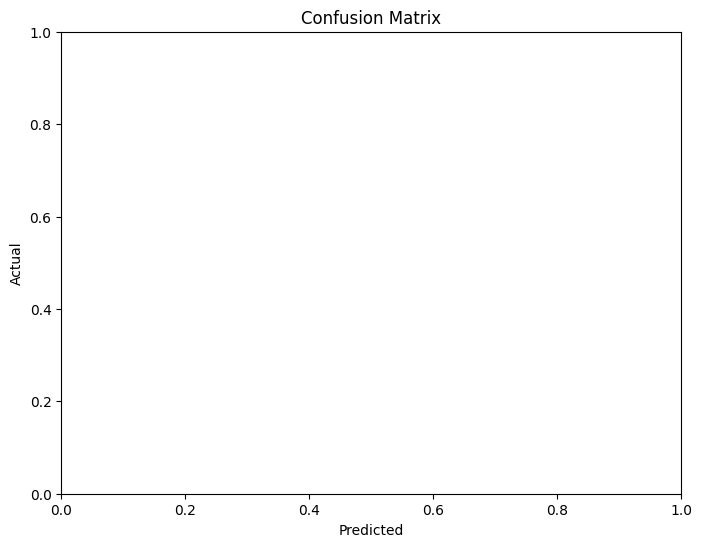

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
F1_score = f1_score(y_test, y_pred, average='macro')

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
# heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_Score: ", F1_score)